In [1]:
import pandas as pd
import numpy as np
import sklearn.preprocessing as skpp
# XGBoost
# https://xgboost.readthedocs.io/en/stable/python/python_api.html#module-xgboost.sklearn
import xgboost as xgb # must be in AMN_windows env
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_predict as cvp
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
from sklearn.multioutput import MultiOutputRegressor
import seaborn as sns
import matplotlib.pyplot as plt
from typing import Dict, Tuple, List


PATH = "biolog_iML1515_AMN.csv"

all_data = pd.read_csv(PATH)
all_data

,EX_nh4_e_i,EX_pi_e_i,EX_co2_e_i,EX_fe3_e_i,EX_h_e_i,EX_mn2_e_i,EX_fe2_e_i,EX_zn2_e_i,EX_mg2_e_i,EX_ca2_e_i,...,VPAMTr_for,VPAMTr_rev,XYLI1_for,XYLI1_rev,XYLI2_for,XYLI2_rev,XYLK,XYLK2,XYLabcpp,GR_AVG
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.780000
1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.430000
2,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.040000
3,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.090000
4,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.910000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17395,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.416667
17396,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.763333
17397,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.310000
17398,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.335000


<AxesSubplot:xlabel='GR_AVG', ylabel='Count'>

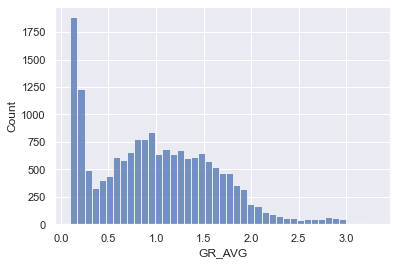

In [2]:
plt.close('all')
sns.set_theme()
sns.histplot(all_data["GR_AVG"])

In [2]:
X = all_data.iloc[:,:-1].values

Y = all_data["GR_AVG"].values.reshape(-1, 1)
print(X.shape, Y.shape)

(17400, 430) (17400, 1)


In [3]:
LOO_split = int(Y.shape[0])

xgb_preds = []

for i in range(1):

    # XGBoost = xgb.XGBRegressor(n_estimators=600, max_depth=2, learning_rate=0.01, objective='reg:squarederror', random_state=i)

    multioutputregressor = MultiOutputRegressor(xgb.XGBRegressor(objective='reg:squarederror'))
    
    xgb_pred = cvp(multioutputregressor, X, Y, cv=KFold(n_splits=10, shuffle=True, random_state=i), n_jobs=10)
    
    xgb_preds.append(xgb_pred)

In [4]:
xgb_preds

[array([[0.99801517],
        [1.055773  ],
        [1.0277449 ],
        ...,
        [1.1973891 ],
        [0.35540903],
        [0.6001799 ]], dtype=float32)]

In [5]:
mean_xgb_pred = np.array(xgb_preds).mean(axis=0)
std_xgb = np.array(xgb_preds).std(axis=0)

print("Mean squared error between mean prediction and true fluxes", np.mean((mean_xgb_pred - Y)**2, axis=0))
# MSE between mean prediction (over 5 times 10-fold test sets) and true

print("Q²: ", r2_score(Y, mean_xgb_pred))

Mean squared error between mean prediction and true fluxes [0.10376879]
Q²:  0.7461695311960561


<AxesSubplot:ylabel='Count'>

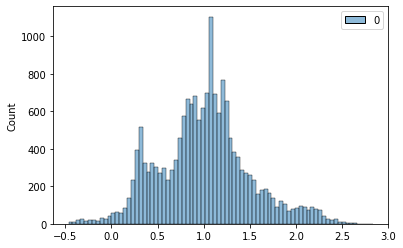

In [6]:
sns.histplot(mean_xgb_pred)

/home/lfaure/miniconda3/envs/XGB/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:>

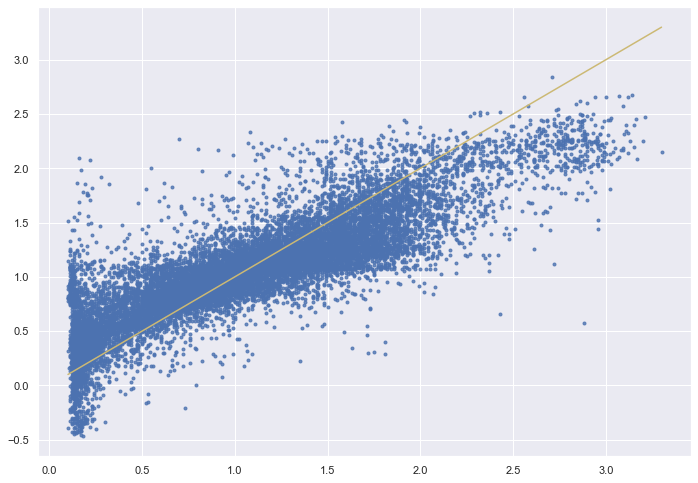

In [25]:
sns.set_theme(palette="colorblind", font_scale=50)
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.regplot(Y, mean_xgb_pred, fit_reg=0, marker='.')
sns.lineplot([min(Y.ravel()), max(Y.ravel())], [min(Y.ravel()), max(Y.ravel())], color='y')

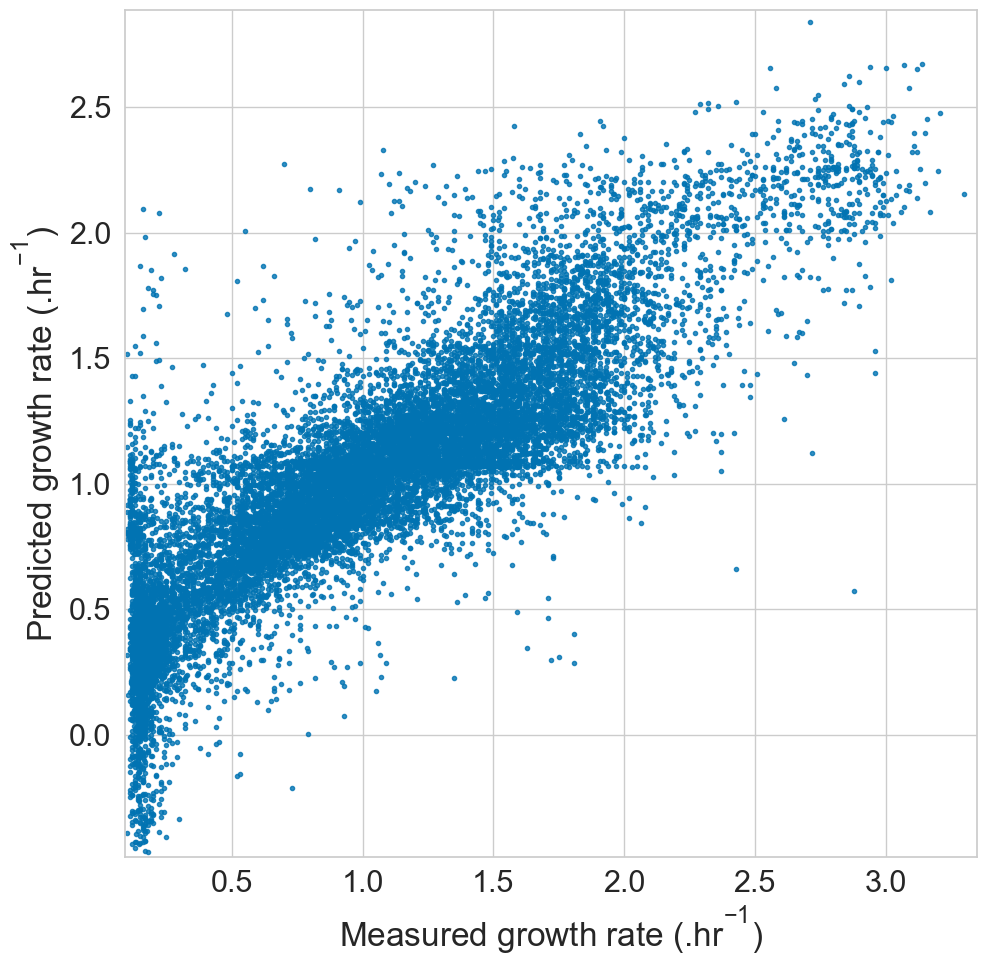

In [7]:
sns.set(font='arial', palette="colorblind", style="whitegrid", font_scale=2, rc={'figure.figsize':(11,11)})
sns.regplot(x=Y, y=mean_xgb_pred, fit_reg=0, marker='.')
# sns.lineplot([min(TRUE.ravel()), max(TRUE.ravel())], [min(TRUE.ravel()), max(TRUE.ravel())], color='y')
plt.xlabel("Measured growth rate (." + r'$\mathregular{hr^{-1}}$' +")")
plt.ylabel("Predicted growth rate (." + r'$\mathregular{hr^{-1}}$' +")")
plt.xlim(min(Y)-0.01, max(Y)+0.05)
plt.ylim(min(mean_xgb_pred)-0.02, max(mean_xgb_pred)+0.05)
plt.show()
# plt.savefig("RegPerf_cobra.png", dpi=500)

<AxesSubplot:title={'center':'ROC curve - XGBoost - AUC=0.93'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

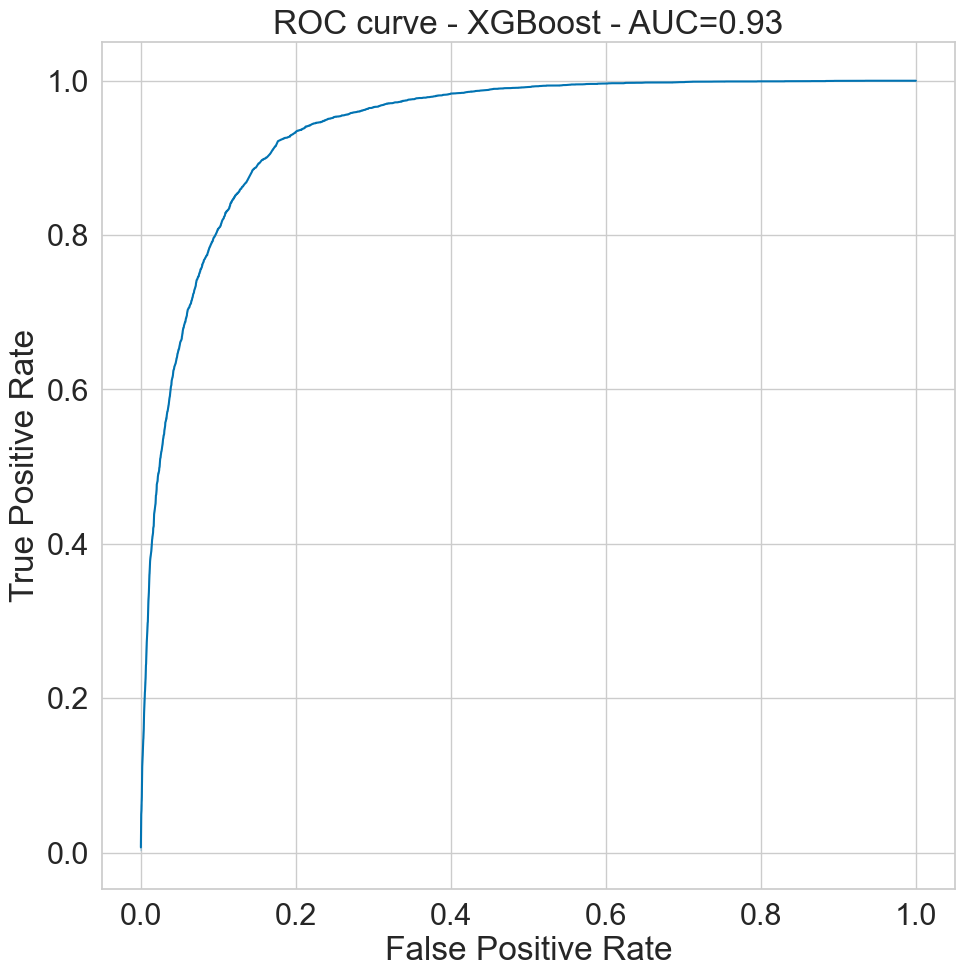

In [26]:
from sklearn.metrics import roc_auc_score, roc_curve

Y_thresholded = [0 if x < 1.2 else 1 for x in Y.ravel()] # 1.2 from the paper but 2.5 or higher gives a better AUC

ROC = roc_curve(Y_thresholded, mean_xgb_pred.ravel())
AUC = roc_auc_score(Y_thresholded, mean_xgb_pred.ravel())
sns.set(font='arial', palette="colorblind", style="whitegrid", font_scale=2, rc={'figure.figsize':(11,11)})
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC curve - XGBoost - AUC=" + str(AUC)[:4])
sns.lineplot(x=ROC[0], y=ROC[1])